# Machine Learning Metrics

This blogpost is a growing collection of different metrics, translated from the math notation to code. I try to keep it as concise and efficient as possible.  
Don't hesitate to contact me for any mistakes found or suggestions.  
Inspiration and reference:  https://github.com/Jam3/math-as-code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [11]:
x = np.linspace(-100,100,201)
y = x + 2
y_scatter = x + np.random.normal(0, 15, 201)

In [12]:
len(x), len(y), len(y_scatter)

(201, 201, 201)

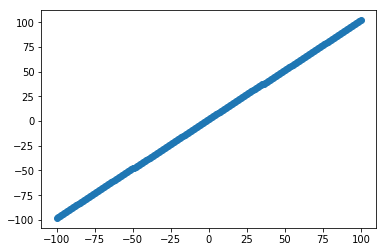

In [13]:
plt.scatter(x,y)

# Evaluation metrics

The metrics which are chosen to evaluate ones machine learning algorithm vary wildly, depending on the usecase (or the Kaggle competition). A few of them are shown below.

**RMSE**  
Arguably on of the most frequently used measure of the differences between values predicted by a model or an estimator and the values observed. The RMSE, also called RMSD, is calculated by taking the square root of the mean of the squared delta between `y_pred` and `y_true`.

$${\displaystyle \operatorname {RMSE} ={\sqrt {\frac {\sum _{t=1}^{T}({\hat {y}}_{t}-y_{t})^{2}}{T}}}}$$

where $y$ is the actual value and $\hat y$ is the predicted value.

In [1]:
def rmse(y_pred, y): return math.sqrt(((y_pred-y)**2).mean())

**SMAPE**  
Symmetric mean absolute percentage error (SMAPE or sMAPE) is an accuracy measure based on percentage (or relative) errors. It is usually defined as follows:

$${\displaystyle {\text{SMAPE}}={\frac {100\%}{n}}\sum _{t=1}^{n}{\frac {\left|F_{t}-A_{t}\right|}{(|A_{t}|+|F_{t}|)/2}}}$$

where $A_t$ is the actual value and $F_t$ is the predicted value.

In [2]:
def SMAPE(y_pred, y): return ((200*np.abs(y_pred-y)/(y+y_pred)).mean())

--------

**Confusion Matrix**
<td>
<table class="wikitable" style="border:none; float:left; margin-top:0;">
<tbody><tr>
<th style="background:white; border:none;" colspan="2" rowspan="2">
</th>
<th colspan="3" style="background:none;">Actual class
</th></tr>
<tr>
<th>Cat
</th>
<th>Dog
</th>
<th>Rabbit
</th></tr>
<tr>
<th rowspan="3" style="height:6em;"><div style="display: inline-block; -ms-transform: rotate(-90deg); -webkit-transform: rotate(-90deg); transform: rotate(-90deg);;">Predicted<br> class</div>
</th>
<th>Cat
</th>
<td><b>5</b>
</td>
<td>2
</td>
<td>0
</td></tr>
<tr>
<th>Dog
</th>
<td>3
</td>
<td><b>3</b>
</td>
<td>2
</td></tr>
<tr>
<th>Rabbit
</th>
<td>0
</td>
<td>1
</td>
<td><b>11</b>
</td></tr></tbody></table>
</td>

**Accuracy**  
The accuracy of a test is its ability to differentiate the cases correctly. To estimate the accuracy of a test, we should calculate the proportion of true positive and true negative in all evaluated cases.

$${\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}$$

In [3]:
def acc(y_pred, y): return np.mean(y_pred == y)

**Precision**  
Precision is the fraction of relevant instances among the retrieved instances.

$${\displaystyle {\text{Precision}}={\frac {tp}{tp+fp}}}$$

**Recall**
Recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.

$${\displaystyle {\text{Recall}}={\frac {tp}{tp+fn}}}$$

**F1-Measure**
The F1-Measure is a measure that combines precision and recall by taking the harmonic mean of precision and recall:

$${\displaystyle F=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$$

# Regularization

In mathematics, statistics, and computer science, particularly in the fields of machine learning and inverse problems, regularization is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting [(source)](https://en.wikipedia.org/wiki/Regularization_(mathematics)).

**L1 Regularization or Lasso Regression**  

$$\sum _{i=1}^{n}(y_{i}-\sum _{j=1}^{p}x_{ij}\beta_{j})^{2}+\lambda\sum _{j=1}^{p}|\beta_{j}|$$  

where $\lambda\sum _{j=1}^{p}|\beta_{j}|$ is the L1 regularization term. Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function. If $\lambda$ is zero the term is a simple ordinary least squares term whereas very large values will make coefficients zero hence it will under-fit.

**L2 Regularization or Ridge Regression**

$$\sum _{i=1}^{n}(y_{i}-\sum _{j=1}^{p}x_{ij}\beta_{j})^{2}+\lambda\sum _{j=1}^{p}\beta_{j}^{2}$$  

where $\lambda\sum _{j=1}^{p}\beta_{j}^{2}$ is the L2 regularization term. Ridge Regression adds the “squared magnitude” of coefficient as penalty term to the loss function. Here, if $\lambda$ is zero, the term is a simple ordinary least squares term. However, if $\lambda$ is very large, the penalty term will add too much weight and it will lead to under-fitting.  
Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.

# Loss functions

**Binary Crossentropy**

$$−(ylog(p)+(1−y)log(1−p))$$

In [1]:
def binary_loss(y, p): return np.mean(-(y * np.log(p) +  (1-y)*np.log(1-p)))

# Activation functions

**Softmax**

$${\displaystyle P(y=j\mid \mathbf {x} )={\frac {e^{\mathbf {x} ^{\mathsf {T}}\mathbf {w} _{j}}}{\sum _{k=1}^{K}e^{\mathbf {x} ^{\mathsf {T}}\mathbf {w} _{k}}}}}$$

**Sigmoid**

In [5]:
def sigmoid(x): return 1 / (1 + math.exp(-x))

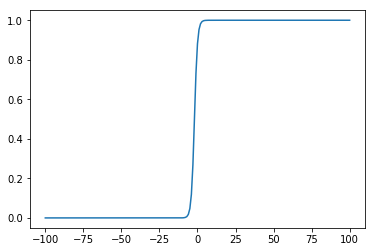

In [18]:
plt.plot(x, [sigmoid(num) for num in y])

**tanh**

In [23]:
def tanh(x): return np.tanh(x)

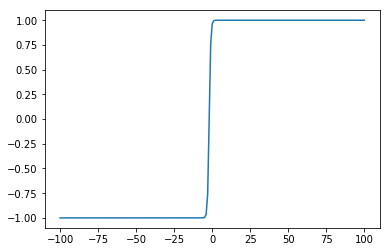

In [24]:
plt.plot(x, tanh(y))

**ReLU**

In [26]:
def relu(x): return max(0,x)

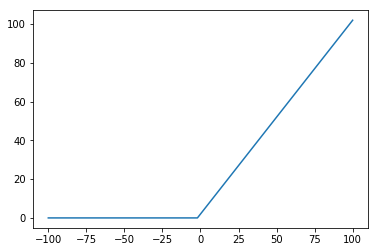

In [27]:
plt.plot(x, [relu(num) for num in y])

# Other statistical measures

**Standard deviation**  
$$\sigma ={\sqrt {{\frac {1}{n}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}},{\rm {\ \ where\ \ }}\mu ={\frac {1}{n}}\sum _{i=1}^{N}x_{i}$$

$n$ = numer of oberservations; $x_{i}$ = observation value; $\mu$ = population mean

**Sample standard deviation**  

$${\displaystyle s={\sqrt {\frac {1}{n-1}{\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}}}}$$

$n-1$ = Bessel's correction; $x_{i}$ = observation value; $\overline x$ = sample mean

**Probability concepts explained**
* https://towardsdatascience.com/probability-concepts-explained-introduction-a7c0316de465
* https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

>Maximum likelihood estimation is a method that determines values for the parameters of a model. The parameter values are found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.

>We want to know which curve was most likely responsible for creating the data points that we observed? Maximum likelihood estimation is a method that will find the values of μ and σ that result in the curve that best fits the data.

> Likelihood and the probability density are fundamentally asking different questions — one is asking about the data and the other is asking about the parameter values.

* https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348

---
the code bel

In [3]:
!jupyter nbconvert --to markdown machine_learning_metrics.ipynb --output README.md

[NbConvertApp] Converting notebook machine_learning_metrics.ipynb to markdown
[NbConvertApp] Support files will be in README_files/
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 9104 bytes to README.md


In [1]:
!jupyter nbconvert --to markdown machine_learning_metrics.ipynb --output ../../fabiange/_posts/2018-09-03-machine_learning_metrics.md

[NbConvertApp] Converting notebook machine_learning_metrics.ipynb to markdown
[NbConvertApp] Support files will be in ../../fabiange/_posts/2018-09-03-machine_learning_metrics_files/
[NbConvertApp] Making directory ../../fabiange/_posts/2018-09-03-machine_learning_metrics_files/../../fabiange/_posts
[NbConvertApp] Making directory ../../fabiange/_posts/2018-09-03-machine_learning_metrics_files/../../fabiange/_posts
[NbConvertApp] Making directory ../../fabiange/_posts/2018-09-03-machine_learning_metrics_files/../../fabiange/_posts
[NbConvertApp] Making directory ../../fabiange/_posts/2018-09-03-machine_learning_metrics_files/../../fabiange/_posts
[NbConvertApp] Writing 8584 bytes to ../../fabiange/_posts/2018-09-03-machine_learning_metrics.md
